# D2W 2D Project Task 1

<div class="alert alert-block alert-info">

**Contents**  

- [Group Members](#Group-Members)  
- [Introduction](#Introduction)  
- [Key Files](#Key-Files)  
- [Importing Data](#Importing-Data)  
- [Data Processing](#Data-Processing)  
- [Data Cleaning](#Data-Cleaning)  
- [Prepare dataset for training model](#Prepare-dataset-for-training-model)  
- [Train Model](#Train-Model)  
- [Model Training Logs](#Model-Training-Logs)  
- [Evaluate Model](#Evaluate-Model)  


</div>

## Group Members 

[Return to top](#D2W-2D-Project-Task-1)  

| Name | ID | Contribution |
| :-: | :-: | :-: |
| Dickson Neo Jia Xuan | 1005203 | Sourcing of data |
| Wang Siyang | 1005485 | Pre-process data, Train model  and evaluate model |
| Fu Meihui | 1004864 | Data visualization, Video presentation |
| James Huang Yong Heng | 1005461 | Sourcing of data |
| Yeo Wan Li | 1005321 | Data visualization |

## Introduction

[Return to top](#D2W-2D-Project-Task-1)  

**Background**: It has been almost two years since COVID-19 first apeared, but there is still no end in sight yet. In a bid to control the pandemic, many governments have turned to data science to predict key statistics. One such statistic is the number of daily COVID-19 deaths.  

By predicting the number of deaths due to COVID-19, the government can better estimate the severity of the pandemic. Globally, as the pandemic becomes endemic and with the appearance of different variants of the virus, being able to predict the daily death toll will help governments to understand how lethal the virus at present.

**Problem Statement**: Predict the number of new deaths in various countries due to COVID-19.     

**Method**: Train Multiple Linear Regression Model with three features(new cases, hospital patients, icu patients) through gradient descent algorithm

## Key Files

[Return to top](#D2W-2D-Project-Task-1)

Below is the directory tree that shows the location of dataset and model (jupyter notebook)

```
task_1
├── Task-1-Final.ipynb
└── owid-covid-data.csv
```

These files have the following specifications:
- `Task-1-Final.ipynb` - contains the code needed to extract data, build model and predict results
- `owid-covid-data.csv` - database of each country's COVID-related data in each day. Data is downloaded from
[Our World in Data (OWID)](https://github.com/owid/covid-19-data/tree/master/public/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data 

[Return to top](#D2W-2D-Project-Task-1)

**Choice of dataset**: Dataset from OWID contains daily data of each country across the world. Hence, there is a large number of data to work with initially (125760 rows, 61 features), making it more likely that there will be sufficient data to train the Linear Regression Model to a high accuracy.

In [2]:
##import dataset
df = pd.read_csv("owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125754,ZWE,Africa,Zimbabwe,2021-10-19,132405.0,37.0,55.571,4659.0,1.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125755,ZWE,Africa,Zimbabwe,2021-10-20,132437.0,32.0,47.000,4659.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125756,ZWE,Africa,Zimbabwe,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
125757,ZWE,Africa,Zimbabwe,2021-10-22,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## Data Processing

[Return to top](#D2W-2D-Project-Task-1)

After plotting each feature against `new_deaths_smoothed`, 2 features are chosen (`new_cases_smoothed`, `hosp_patients`). Theoretically, as the number of cases or patients increase, the number of deaths should increase linearly as well, making it a good candidate for Linear Regression.

However, the scatter plots show that the features increase and decrease at an increasing rate, instead of following a linearly increasing trend. Upon further reasearch, our team hypothesised that this is due to the time taken for COVID-19 to kill a patient. According to the [Institute for Health Metrics and Evaluation (IHME)](https://covid19.healthdata.org/global?view=daily-deaths&tab=trend), there is a 17-21 day lag between infection and death.

Hence, for each country, we shifted the features down by 19 days. Data Visualization shows that post-processing, the data now follows a more linear trend. This trend can be observed when looking into data in a country. In the following example, we chose United States

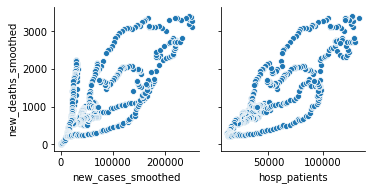

In [12]:
## Data Visualization (US) before data is processed
country_df = df.loc[df['location'] == 'United States']
features = ['new_cases_smoothed','hosp_patients']
myplot=sns.pairplot(data = country_df,
                    y_vars=['new_deaths_smoothed'],
                    x_vars=features)

In [8]:
##Code for processing data
##Set variable data
feature_names = ['new_cases_smoothed','hosp_patients']
target_name = ['new_deaths_smoothed']
country_info = ['iso_code','continent','location','date']

##copy data over into new dataframe
clean_df = df.loc[:,country_info].copy()

##create new feature columns
for shifted_feature in feature_names:
    clean_df[shifted_feature + '_shifted'] = 0

##shift data for each column in feature_name downward by 19 days
##since there is a 17-21 day lag between infection and death
shift_val = 19
for location in set(df['location'].values):
    for i in range(len(feature_names)):
        feature = feature_names[i]
        feature_shifted = feature + '_shifted'

        copied_column = df[df['location'] == location][feature]
        shifted_data = copied_column.shift(periods = shift_val, fill_value = 0)

        row_indexes = clean_df[clean_df['location'] == location].index
        clean_df.loc[row_indexes,feature_shifted] = shifted_data

##copy target column
clean_df[target_name] = df[target_name]

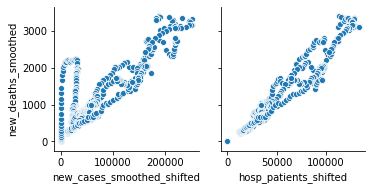

In [13]:
## Data Visualization (US) after data is processed
country_df = clean_df.loc[df['location'] == 'United States']
features = ['new_cases_smoothed_shifted','hosp_patients_shifted']
myplot=sns.pairplot(data = country_df,
                    y_vars=['new_deaths_smoothed'],
                    x_vars=features)

## Data Cleaning

[Return to top](#D2W-2D-Project-Task-1)

With the large number of data points, checks to remove illogical data points is necessary. For example, rows with NaN values in selected features are removed. Sections with regional data (e.g. aggregate data for continents) are removed too. Sanity checks, such as a positive number of COVID-19 deaths and checking that there are more deaths than cases are carried out.


In [14]:
##remove continents
continents = ['Africa','Asia','Europe','European Union','North America','South America','Oceania','World']
clean_df = clean_df.loc[~clean_df['location'].isin(continents)]

##remove NaN in features
for feature in feature_names:
    feature += '_shifted'
    clean_df = clean_df[clean_df[feature].notna()]

##target: new_deaths_smoothed
clean_df = clean_df[clean_df[target_name[0]].notna()]
clean_df = clean_df[clean_df[target_name[0]]>0]

##remove the case where new_deaths is larger than number of cases
clean_df = clean_df[clean_df['new_cases_smoothed_shifted'] > clean_df[target_name[0]]]

##update df to point towards clean_df instead
df = clean_df.iloc[:,4:]
df

,new_cases_smoothed_shifted,hosp_patients_shifted,new_deaths_smoothed
7274,731.857,856.0,14.571
7275,602.857,823.0,15.286
7276,552.429,829.0,16.714
7277,501.429,826.0,16.000
7278,466.143,712.0,14.143
...,...,...,...
119821,112060.571,68928.0,1675.000
119822,109322.286,67143.0,1672.714
119823,108132.857,64844.0,1653.143
119824,107312.429,64394.0,1715.000


## Prepare dataset for training model

[Return to top](#D2W-2D-Project-Task-1)

Model will be trained using the train dataset, which is a subset of the entire dataset. Test_size is set at 0.3. Since more training data will help to produce a model with higher accuracy, we want the training data to be larger than that of the test data. At the same time, we still want to retain a significant proportion from the model to test its ability to generalize to unseen data. Hence, we decided to split 30% of the data to be testing data, and the rest 70% will be used to train the model.

To create the train dataset, data is also split into train and test set randomly. The random state is set as fixed, in order to do a meaningful comparison between different models that were generated throughout the modelling process.  

Just before we input the data into the model, we will do a normalization of the data due to the wide range for each x-value, since the data ranges from 0 to 6 digit figures for `new_cases_smoothed`. Hence, we want to minimize noise and ensure that features with larger values (`new_cases_smoothed`) does not overshadow other features (`hosp_patients`)

In [16]:
##split data into train and test set
def get_features_targets(df,feature_names,target_name):
    df_feature = df.loc[:,feature_names]
    df_target = pd.DataFrame(df.loc[:,target_name])
    return df_feature, df_target

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    n = df_feature.shape[0]
    size = int(n*test_size)
    
    test_idx = np.random.choice(n, size,replace = False)
    df_feature_test = pd.DataFrame(df_feature.iloc[test_idx])
    df_target_test = pd.DataFrame(df_target.iloc[test_idx])

    train_idx = list(set(i for i in range(n)) - set(test_idx))
    df_feature_train = pd.DataFrame(df_feature.iloc[train_idx])
    df_target_train = pd.DataFrame(df_target.iloc[train_idx])
    return df_feature_train, df_feature_test, df_target_train, df_target_test

feature_names = df.columns[:-1]
df_features, df_target = get_features_targets(df,feature_names,target_name)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,100,0.3)

##helper functions for preparing data for insertion into model
def normalize_z(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    dfout = (df - mean)/std
    return dfout

def prepare_features(df_feature):
    df_feature = normalize_z(df_feature)
    m = df_feature.shape[0]
    first_column = np.ones(m).reshape(m,1)
    x_matrix = np.concatenate((first_column,df_feature),1)
    return x_matrix

def prepare_target(df_target):
    return df_target.to_numpy()

## Train Model

[Return to top](#D2W-2D-Project-Task-1)

Since both factors `new_cases_smoothed`, `hosp_patients` are continuous data and generally follow a linear trend, a Multiple Linear Regression model is suitable to model `new_deaths_smoothed`. Using gradient descent, we iteratively improve the model.

In [24]:
##set up cost function
def compute_cost(X, y, beta):
    J = 0
    hypothesis  = np.matmul(X,beta)
    error = hypothesis - y
    m = y.shape[0]
    J = (1/(2*m)) * np.matmul(error.T,error)
    return J

##set up gradient descent
def gradient_descent(df, beta, alpha, num_iters):
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,100,0.3)
    
    X_train = prepare_features(df_features_train)
    y_train = prepare_target(df_target_train)
    X_test = prepare_features(df_features_test)
    y_test = prepare_target(df_target_test)
    
    m = y_train.shape[0]
    J_storage_train = np.zeros((num_iters,1))
    J_storage_test = np.zeros((num_iters,1))
    for i in range(num_iters):
        derivative = (1/m) * np.matmul(X_train.T, (np.matmul(X_train,beta)-y_train))
        beta = beta - alpha * derivative
        J_storage_train[i] = compute_cost(X_train,y_train,beta)
        J_storage_test[i] = compute_cost(X_test,y_test,beta)
    return beta, J_storage_train, J_storage_test

##optimize weights
n = len(df_features.columns)
iterations = 100
alpha = 0.1
beta = np.zeros((n+1,1))

beta, J_storage_train, J_storage_test = gradient_descent(df, beta, alpha, iterations)

## Model Training Logs

[Return to top](#D2W-2D-Project-Task-1)

During training of data, it is shown that the cost of train datasets do not change much after 100 iterations. Hence, we can conclude that the model has reached a local minimum of cost. Overfitting did not occur as the difference in cost between test and train dataset continued to stay the same.  

Besides monitoring the cost function, we also kept a record of the cost function as we tweaked the features/target of the model.

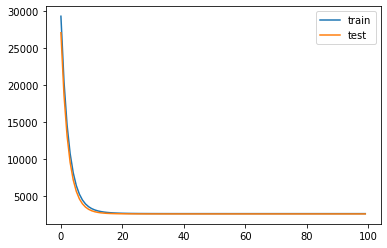

In [25]:
plt.plot(J_storage_train)
plt.plot(J_storage_test)
plt.legend(['train','test'])

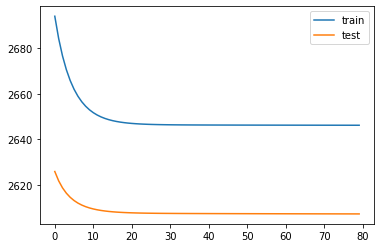

In [27]:
#zoom-in picture of the tail, 
#since the initial high cost makes it difficult to compare
#cost of train and test over iterations towards the end
plt.plot(J_storage_train[20:])
plt.plot(J_storage_test[20:])
plt.legend(['train','test'])

In [26]:
#Cost of train dataset
J_storage_train[-1][0]

2646.248831129654

| Model | Cost | Description | Remarks |
| :-: | :-: | :-: | :-: |
| 1 | 103775718.568 | Use 2 variables only (`total_cases`, `excess_mortality`) vs `total_deaths` |
| 2 | 41.767 | Use 4 variables <br>(`icu_admissions`, `vaccinations`, `mortality`, `stringency index`) <br> vs `total_deaths` | This model was not used as the available data points decreased significantly, making it difficult to generalize. |
| 3 | 3449.231 | Use 3 variables, after shifting each variable down by 19 days <br> (`new_cases_smoothed_shifted`,`hosp_patients_shifted`,`icu_patients_shifted`) <br> vs `new_deaths_smoothed` | This model was not accepted as p-value for `icu_patients_shifted` was 0.507, when the same dataset was used to create a Linear Regression in Excel. The high p-value indicates that `icu_patients_shifted` is not contributing to the model |
| 4 | 3354.924 | Use 3 variables, after shifting new cases and hospital patients by 19 days,<br> and icu patients by 15 days | The model was not accepted as the Root Mean Squared Error (RMSE) increased from the previous model. When the same dataset is run in Excel, the p-value for `icu_patients_shifted` became close to 0, which indicates that it is contributing to the model. However, the fact that the RMSE increased, meant that shifting `icu_patients_shifted` data alone was not helpful in creating a more accurate model. |
| 5 | 2646.248 | Use 2 variables, after shifting each variable down by 19 days (`new_cases_smoothed_shifted`,`hosp_patients_shifted`) <br> vs `new_deaths_smoothed` | After removing `icu_patients_shifted`, cost decreased. Compared to other combinations of the three variables chosen initially, the lowest cost was achieved with this combination |

## Evaluate Model

[Return to top](#D2W-2D-Project-Task-1)

**Chosen Metric**: RMSE was chosen as a metric in order to evaluate the accuracy of this model. The closer it is to 0, the more accurate it is.  

**Results**: The root mean squared error of the model is 72.2 (3s.f). This shows that there is an error of 72.2 new deaths from the actual value.  

**Limitations**:

1. *Each country has its own hospitalization policies*  
During pre-processing, the hospitalization data is shifted by 19 days, based on the assumption that COVID-19 patients are admitted to hospital on the day they are infected. However, hospitalization policies vary from country to country, and even within the country itself. If a hospital only admits severe COVID cases, the time between hospitalization and death of a COVID-19 patient would be lower than the average of 19. Hence, each country should have a different value of which the hospitalization data should be shifted by. However, such data is difficult to collate.

2. *Each country has its own definition of COVID-19 case*  
While some countries may consider ART-positive patients to be COVID-19 patients, other undergo more stringent PCR tests before confirming cases. This results in more false positives for some countries, which will incorrectly increase the number of COVID-19 cases in the country.

3. *Countries may under-report COVID-19 cases*  
As the pandemic overwhelms a country's healthcare system, more COVID-19 patients are turned away. This results in the value of new cases for that country to be lower than it actually is, hence having a higher daily death toll as compared to other countries that are better able to handle the same number of COVID-19 patients.


In [28]:
## get the predicted values for test dataset
def predict(df_feature, beta):
    #df_feature = prepare_features(df_feature)
    df_feature = prepare_features(df_feature)
    pred_y = np.matmul(df_feature,beta)
    return pred_y

pred = predict(df_features_test,beta)

In [36]:
## change predicted results into Dataframe form,
## so that can compare with original data
mod_pred = pd.DataFrame(pred, columns = ['predicted deaths'], index = df_target_test.index)
pd.concat([df_target_test,mod_pred],1)

,new_deaths_smoothed,predicted deaths
80135,17.571,72.634681
106445,121.571,200.793111
7349,0.714,-5.699694
40907,598.143,637.522502
40105,0.429,-5.184652
...,...,...
109041,20.429,31.915040
56307,2.286,0.107130
101897,97.571,44.407356
40629,0.143,-6.540172


Text(0, 0.5, 'new_deaths_smoothed')

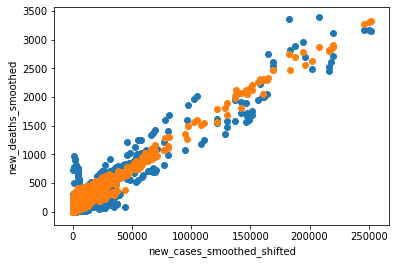

In [31]:
plt.scatter(df_features_test[feature_names[0]],df_target_test)
plt.scatter(df_features_test[feature_names[0]],pred)
plt.xlabel(feature_names[0])
plt.ylabel(target_name[0])

Text(0, 0.5, 'new_deaths_smoothed')

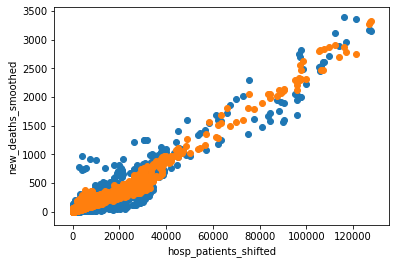

In [32]:
plt.scatter(df_features_test[feature_names[1]],df_target_test)
plt.scatter(df_features_test[feature_names[1]],pred)
plt.xlabel(feature_names[1])
plt.ylabel(target_name[0])

In [33]:
def r2_score(y, ypred):
    error_n = y - ypred
    numerator = np.matmul(error_n.T,error_n)[0][0]/y.shape[0]
    #print(numerator)
    error_d = y - np.full((y.shape[0],y.shape[1]),np.mean(y))
    denominator = np.matmul(error_d.T,error_d)[0][0]/y.shape[0]
    #print(denominator)
    
    return 1 - numerator/denominator


def root_mean_squared_error(target, pred):
    error = target - pred
    n = target.shape[0]
    mse = ((1/n) * np.matmul(error.T,error))[0][0]
    return mse ** 0.5
    ###
    pass

In [35]:
# change target test set to a numpy array
target = prepare_target(df_target_test)

# Calculate r2 score by calling a function
r2 = r2_score(target,pred)
rmse = root_mean_squared_error(target,pred)
print(r2)
print(rmse)

0.9281877212315592
72.21303863283444
